# TITANIC MACHINE LEARNING FROM DISASTER
**THE CHALLENGE**

The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew. While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.
Here, we'll try to predict which passengers survived the tragedy by applying tools machine learning.

![](https://media.giphy.com/media/OJw4CDbtu0jde/giphy.gif)

#  LOADING THE DATASET

We start by loading our datasets into Pandas Dataframes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_train= pd.read_csv("/kaggle/input/titanic/train.csv")
df_test= pd.read_csv("/kaggle/input/titanic/test.csv")
df_train.sample(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
684,685,0,2,"Brown, Mr. Thomas William Solomon",male,60.0,1,1,29750,39.0000,NaN,S
373,374,0,1,"Ringhini, Mr. Sante",male,22.0,0,0,PC 17760,135.6333,NaN,C
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
406,407,0,3,"Widegren, Mr. Carl/Charles Peter",male,51.0,0,0,347064,7.7500,NaN,S
225,226,0,3,"Berglund, Mr. Karl Ivar Sven",male,22.0,0,0,PP 4348,9.3500,NaN,S
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S
668,669,0,3,"Cook, Mr. Jacob",male,43.0,0,0,A/5 3536,8.0500,NaN,S
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S
497,498,0,3,"Shellard, Mr. Frederick William",male,NaN,0,0,C.A. 6212,15.1000,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S


# CHECKING DATAFRAME SUMMARY
Now, that we have loaded our data into the dataframe let's check the summary for this dataframe. Checking this information helps us to get early insights regarding our data. Pandas **Pandas.DataFrame.info() method will help us in extracting this summary. This will include the index dtype and columns, non-null values and memory usage.

In [2]:
df_train.info()
print('_'*100)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
____________________________________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtyp

Here, our training dataset has a total of 891 entries. Age, Cabin, Embarked consists of null values and might require correction.

**Datatypes:**

7 features in our training dataset are integer or floats.

5 features are strings(object)

# ANALYZING FEATURES


In [3]:
df_train.describe(include=object)


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Francatelli, Miss. Laura Mabel",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


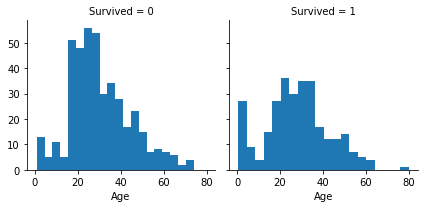

In [4]:
g = sns.FacetGrid(df_train, col='Survived')
g.map(plt.hist, 'Age', bins=20)


**Observations**
* Age has an impact on the survival rate
* Embarked consists of 3 possible values. Port S is used by maximum passengers.
* Ticket feature has about 23% of duplicate values (unique values=681)
* Cabin feature has many null values.

**Decision**
* Age is related to survival hence the missing values needs to be filled
* Drop Ticket,Cabin,as it contains null and duplicate values.

In [5]:
df_train=df_train.drop(["PassengerId","Name","Ticket","Cabin"],axis=1)
df_test=df_test.drop(["Name","Ticket","Cabin"],axis=1)

**Correction**
* Replacing gender by 0 for male and 1 for female
* Replacing missing values of age by mean
* Dropping missing values of the categorical variable 'embarked' and converting it into dummy/indicator variables.

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [7]:
df_train["Sex"] = df_train["Sex"].replace(["male","female"],[0,1])
df_train["Age"][df_train["Age"].isna()]=df_train["Age"].mean()
freq_port = df_train.Embarked.dropna().mode()[0]
freq_port
df_train= pd.get_dummies(df_train)
df_train.info()

df_test["Sex"] = df_test["Sex"].replace(["male","female"],[0,1])
df_test["Age"][df_test["Age"].isna()]=df_test["Age"].mean()
df_test["Fare"][df_test["Fare"].isna()]=df_test["Fare"].mean()
df_test= pd.get_dummies(df_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_C  891 non-null    uint8  
 8   Embarked_Q  891 non-null    uint8  
 9   Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 51.5 KB


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [8]:
#test 
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked_C   418 non-null    uint8  
 8   Embarked_Q   418 non-null    uint8  
 9   Embarked_S   418 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 24.2 KB


In [9]:
#test 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_C  891 non-null    uint8  
 8   Embarked_Q  891 non-null    uint8  
 9   Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 51.5 KB


In [10]:
#test 
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,892,3,0,34.5,0,0,7.8292,0,1,0
1,893,3,1,47.0,1,0,7.0000,0,0,1
2,894,2,0,62.0,0,0,9.6875,0,1,0
3,895,3,0,27.0,0,0,8.6625,0,0,1
4,896,3,1,22.0,1,1,12.2875,0,0,1


In [11]:
#test 
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1


# MODEL AND PREDICT

In [12]:
from sklearn.ensemble import RandomForestClassifier

 

y = df_train["Survived"]

 

features = ["Pclass", "Fare", "Age", "SibSp", "Parch", "Sex", "Embarked_C", "Embarked_Q", "Embarked_S"]
X = pd.get_dummies(df_train[features])
X_test = pd.get_dummies(df_test[features])

 

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

 

output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
